In [7]:
!pip install ultralytics

# 파싱 단계

### pt to onnx

In [60]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("yolo11n.pt")

# Export the model to ONNX format
model.export(format="onnx")

# Load the exported ONNX model
onnx_model = YOLO("yolo11n.onnx")

# Run inference
results = onnx_model("https://ultralytics.com/images/bus.jpg")

Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu124 CPU (AMD Ryzen 3 3300X 4-Core Processor)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.16.0 opset 19...
ONNX: slimming with onnxslim 0.1.47...
ONNX: export success ✅ 0.9s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (1.2s)
Results saved to /mnt/share_nvme/repo/hailo_8_env/tutorial
Predict:         yolo predict task=detect model=yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo11n.onnx for ONNX Runtime inference...
U

### onnx to har(hailo architecture)

In [61]:
from hailo_sdk_client import ClientRunner

model_name = 'yolo11n'
ckpt_path = 'yolo11n.onnx'
start_node = 'resnet_v1_18/conv1/Pad'
end_node = '/model.23/Concat_3'
chosen_hw_arch = 'hailo8'

In [62]:
runner = ClientRunner(hw_arch=chosen_hw_arch)
hn, npz = runner.translate_onnx_model(ckpt_path, model_name, end_node_names=end_node)

[info] Translation started on ONNX model yolo11n
[info] Restored ONNX model yolo11n (completion time: 00:00:00.05)
[info] Extracted ONNXRuntime meta-data for Hailo model (completion time: 00:00:00.18)
[info] NMS structure of yolov8 (or equivalent architecture) was detected.
[info] In order to use HailoRT post-processing capabilities, these end node names should be used: /model.23/cv2.0/cv2.0.2/Conv /model.23/cv3.0/cv3.0.2/Conv /model.23/cv2.1/cv2.1.2/Conv /model.23/cv3.1/cv3.1.2/Conv /model.23/cv2.2/cv2.2.2/Conv /model.23/cv3.2/cv3.2.2/Conv.
[info] Start nodes mapped from original model: 'images': 'yolo11n/input_layer1'.
[info] End nodes mapped from original model: '/model.23/Concat_3'.
[info] Translation completed on ONNX model yolo11n (completion time: 00:00:00.96)


In [63]:
hailo_model_har_name = f'{model_name}.har'
runner.save_har(hailo_model_har_name)

[info] Saved HAR to: /mnt/share_nvme/repo/hailo_8_env/tutorial/yolo11n.har


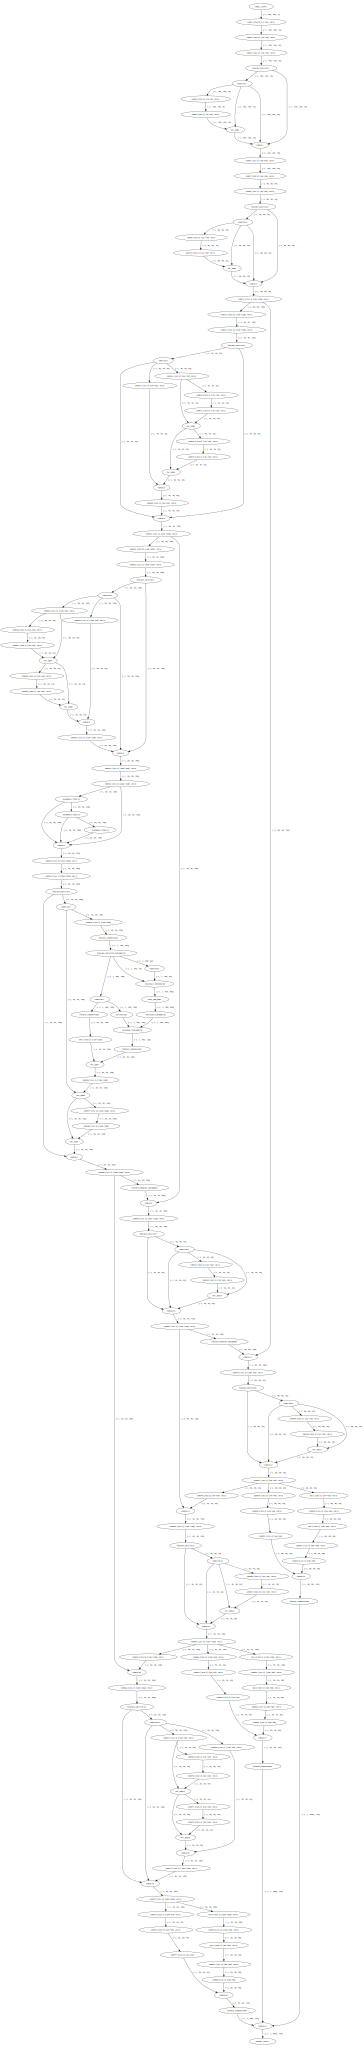

In [65]:
from IPython.display import SVG
!hailo visualizer {hailo_model_har_name} --no-browser
SVG('yolo11n.svg')